<a href="https://colab.research.google.com/github/JuyongLee1/tmlab_github/blob/main/%EB%B6%88%EB%9F%AC%EC%98%A8_bertopic_%EC%9E%AC%EC%8B%A4%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bertopic

In [ ]:
!pip install bertopic[flair,gensim,spacy,use]
!pip install bertopic[vision,visualization]

In [ ]:
import pandas as pd
import numpy as np
import bertopic
import re
from bertopic import BERTopic
from bertopic import _utils
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import KeyBERTInspired
from bertopic.representation import MaximalMarginalRelevance
import matplotlib.pyplot as plt

In [ ]:
#모델 불러오기
topic_model = BERTopic.load("my_topics_model_0811")

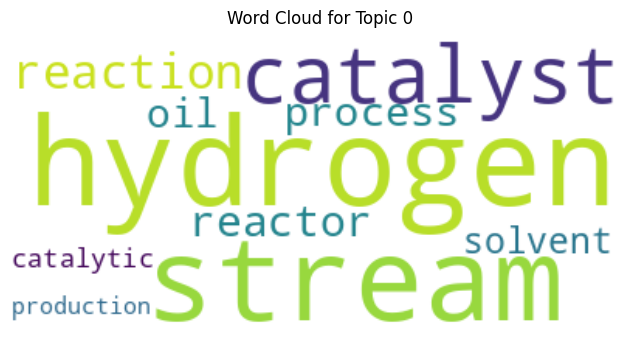

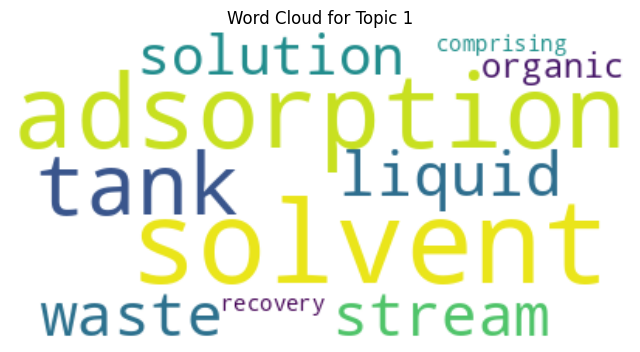

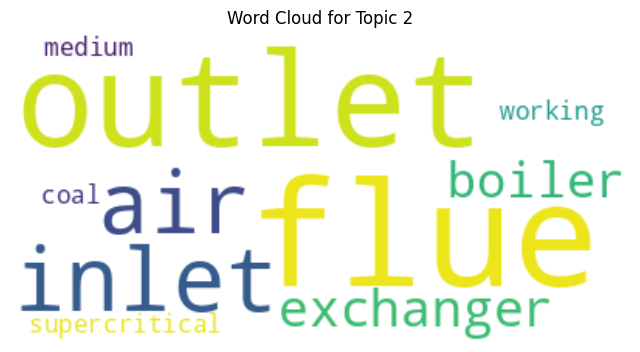

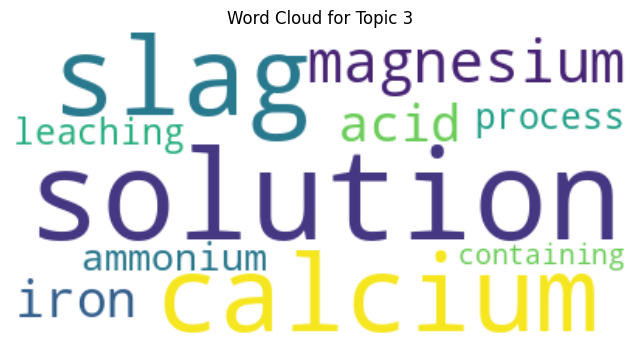

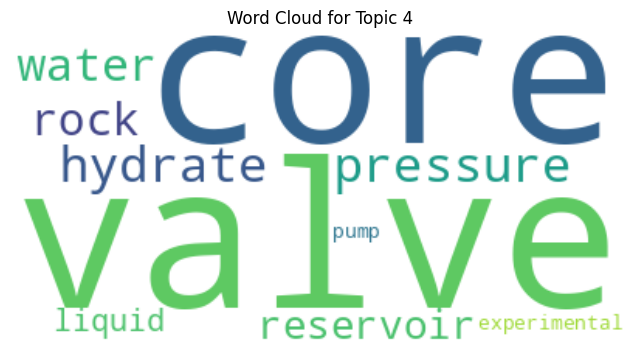

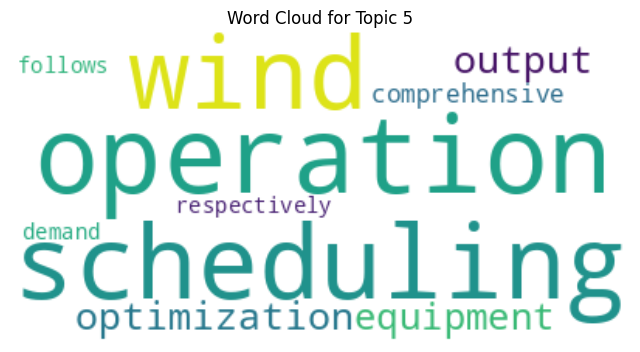

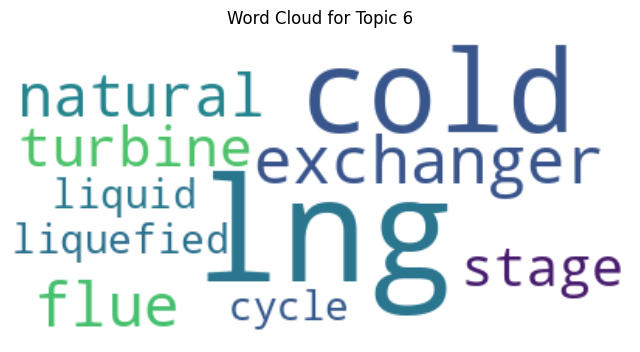

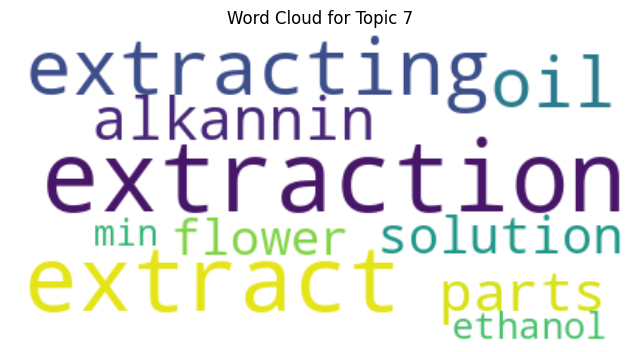

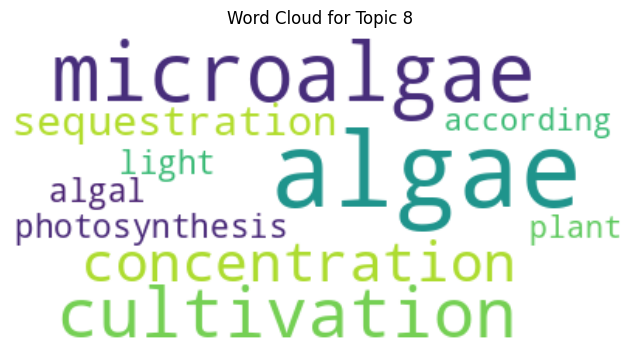

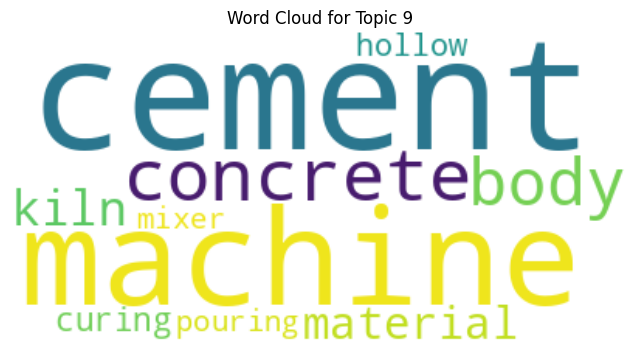

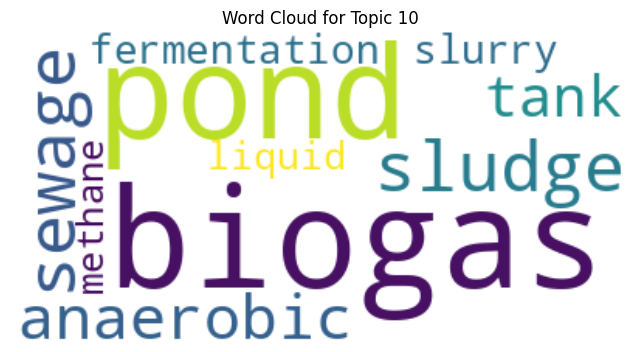

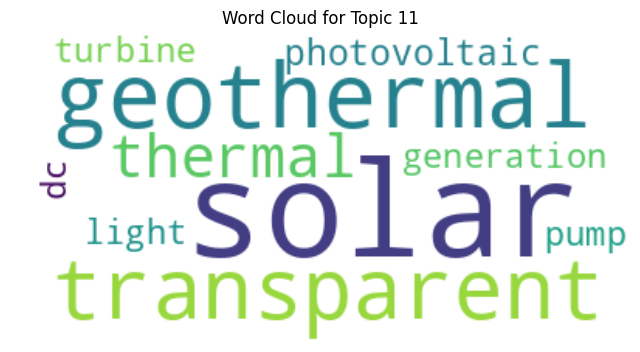

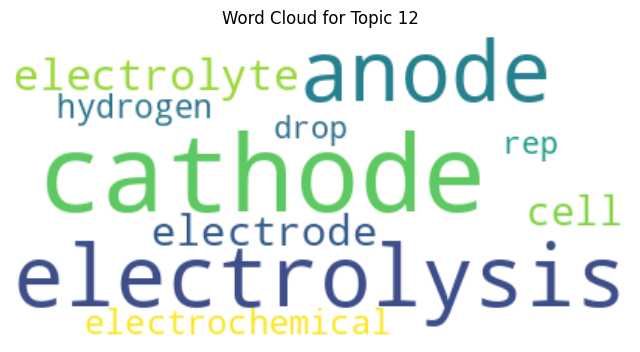

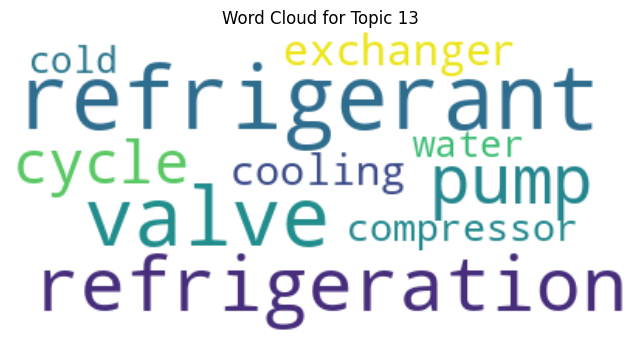

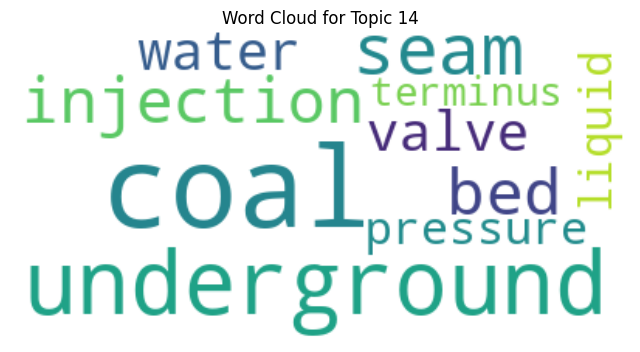

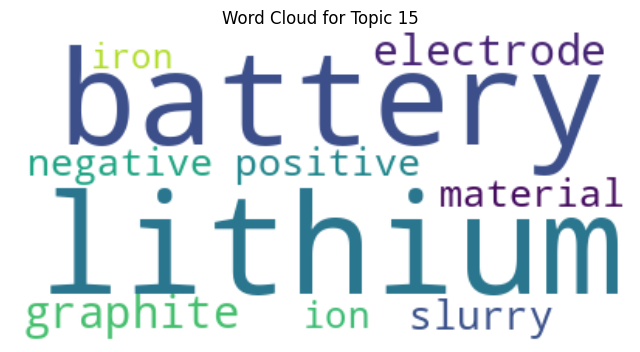

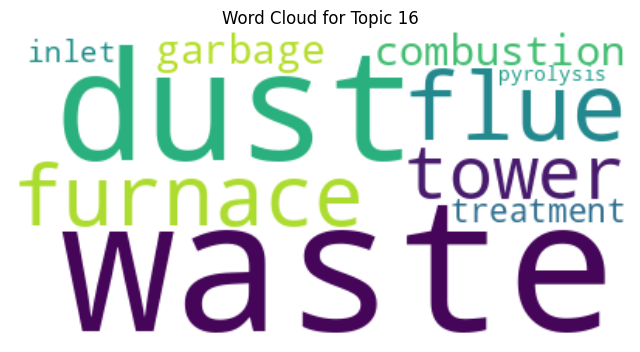

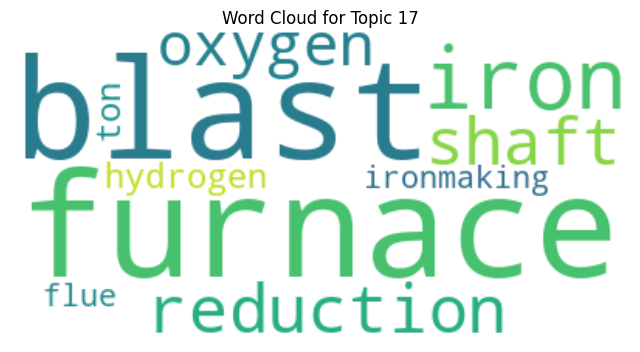

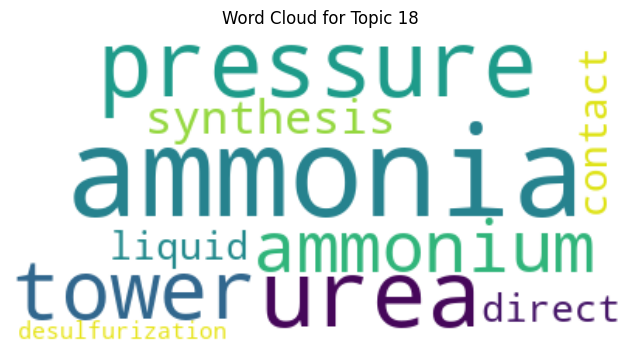

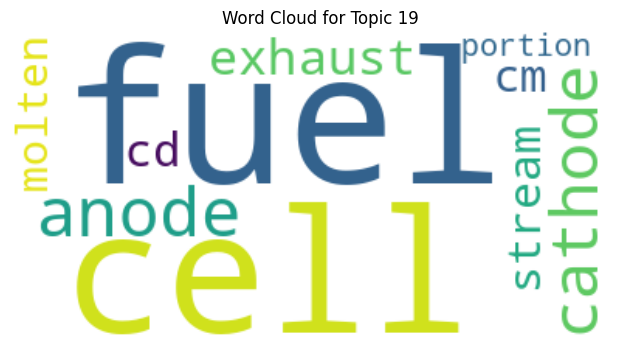

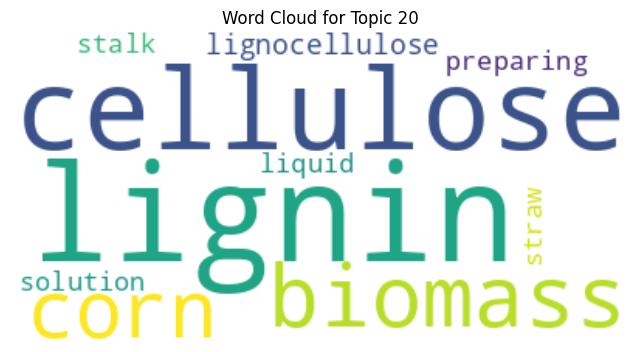

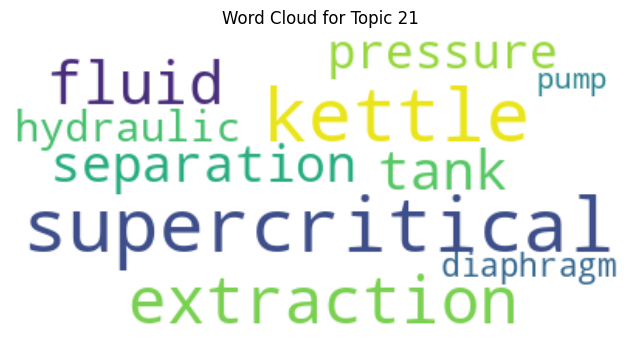

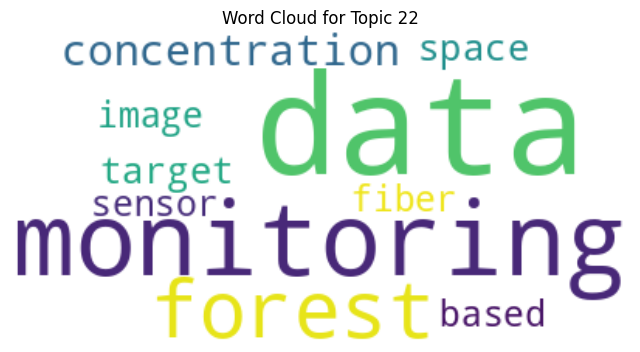

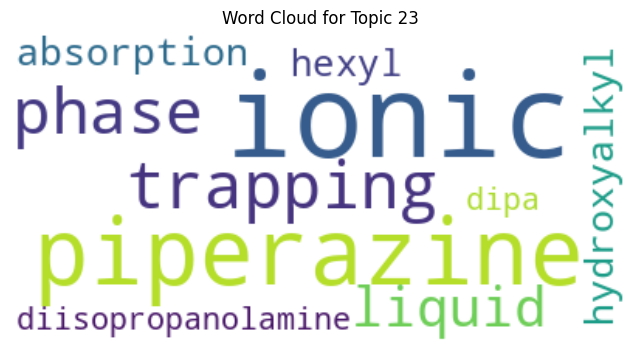

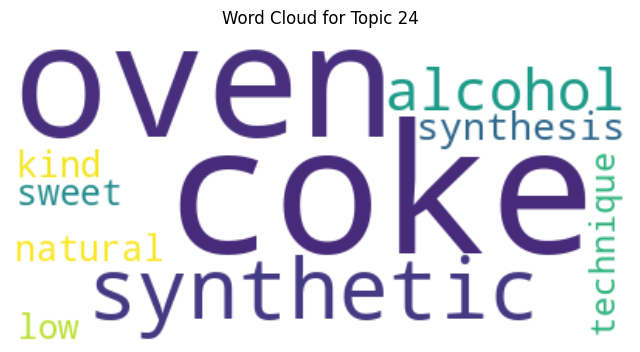

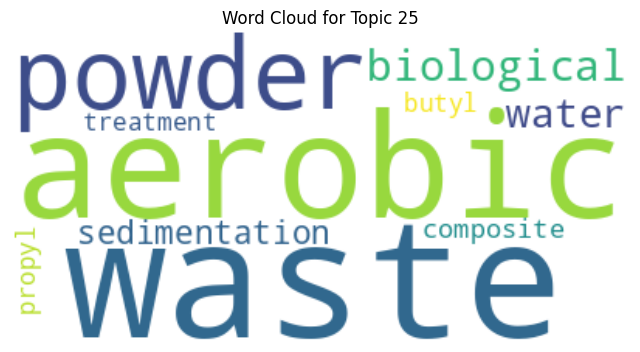

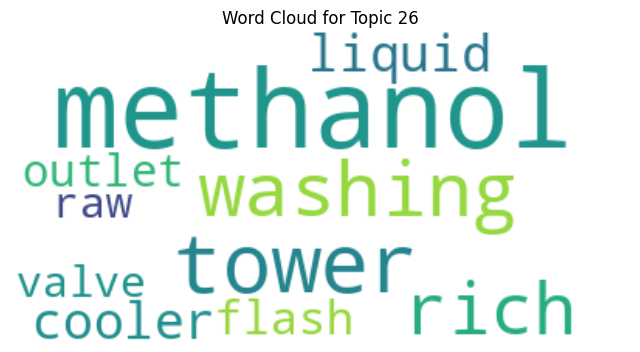

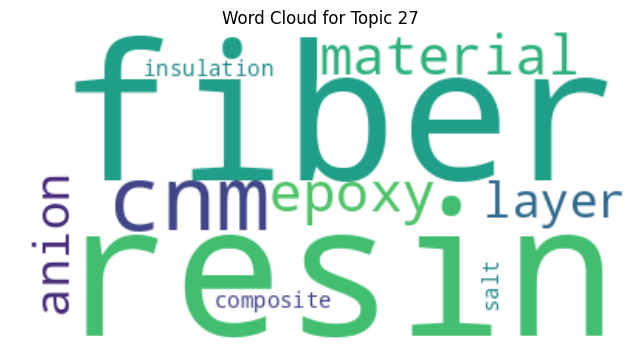

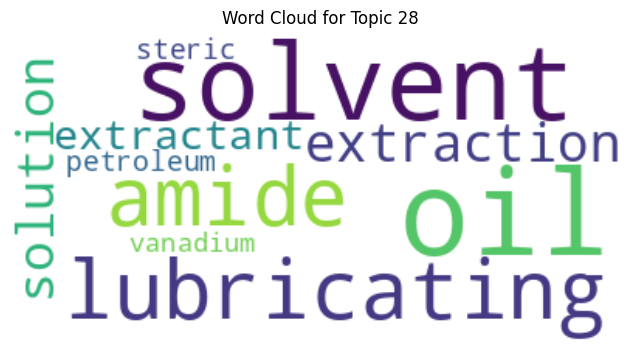

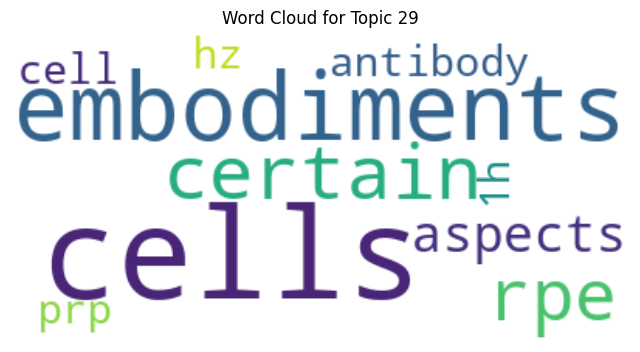

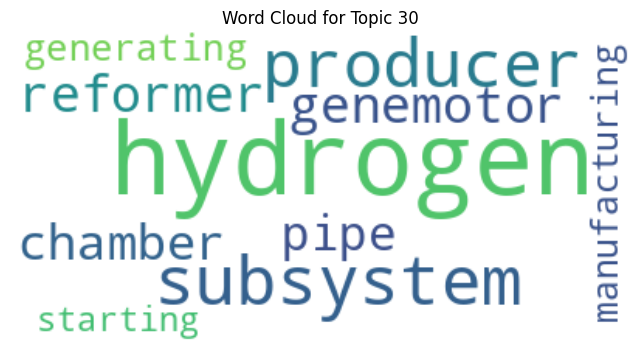

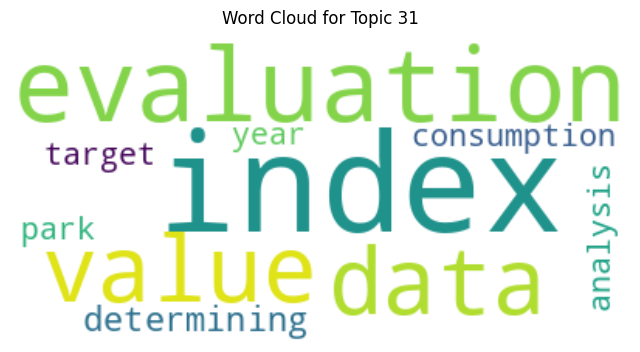

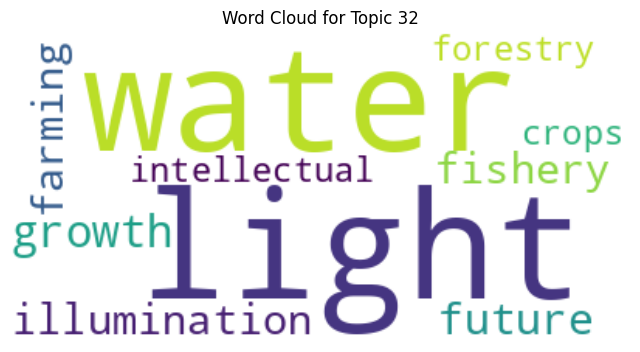

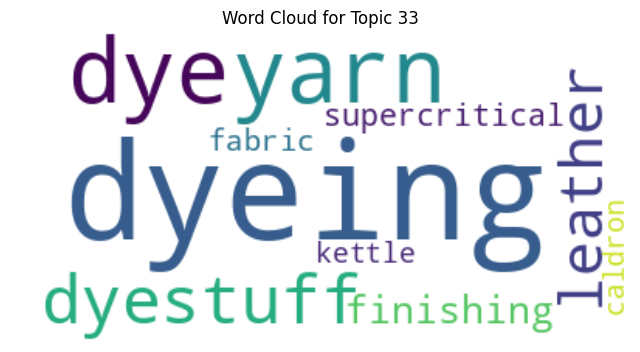

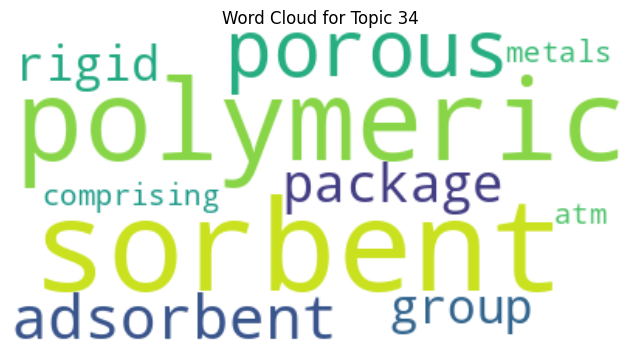

TypeError: ignored

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic}")
    plt.show()

# Show wordclouds for all topics
for topic in range(len(topic_model.get_topics())):
    create_wordcloud(topic_model, topic=topic)

In [ ]:
topic_model.visualize_barchart(top_n_topics=99, n_words=9) #, width=650

In [ ]:
# "priority date" 컬럼에서 연도 정보를 추출하여 리스트로 만듭니다
data['priority date'] = pd.to_datetime(data['priority date'])
filtered_data = data[data['priority date'] <= '2022-12-31']
years = filtered_data['priority date'].dt.year.tolist()

# 토픽 및 연도를 묶어서 데이터프레임 생성
min_length = min(len(topics), len(years))
topic_df = pd.DataFrame({'Topic': topics[:min_length], 'Year': years[:min_length]})
# Topic -1을 제외한 행을 필터링한 데이터프레임을 만듭니다
#filtered_topic_df = topic_df[(topic_df['Topic'] != -1)]
filtered_topic_df = topic_df[(topic_df['Topic'] != -1) & (topic_df['Topic'] != 0) & (topic_df['Topic'] != 1)]

# 연도별 토픽 분포를 계산합니다
topic_distribution_by_year = filtered_topic_df.groupby(['Year', 'Topic']).size().unstack(fill_value=0)


# 시각화
plt.figure(figsize=(15, 20))
topic_distribution_by_year[topic_distribution_by_year.index <= 2022].plot(kind='line')
plt.xlabel('Year (Until 2022)')
plt.ylabel('Topic Frequency')
plt.title('Topic Distribution by Year')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

NameError: ignored